## Importing libraries and dataset

In [122]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import svm
import os
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [123]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from keras.models import Sequential
from keras.layers import Dense
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder , StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

In [124]:
os.chdir('/content/gdrive/MyDrive/Dataset')

In [125]:
dataset = pd.read_csv('/content/gdrive/MyDrive/Dataset/winequality-red.csv', delimiter=";")
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


##Dataset Info

In [126]:
#Dataset info
dataset.info()
dataset.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


(1599, 12)

In [127]:
#Dataset null cells
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [128]:
#Basic Statistics
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Exploratory Analysis

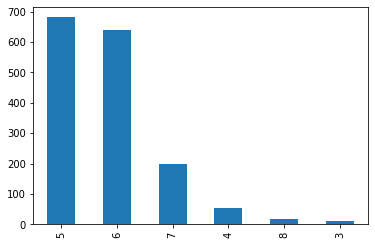

In [129]:
#Quality distribuition
dataset["quality"].value_counts().plot(kind='bar');

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


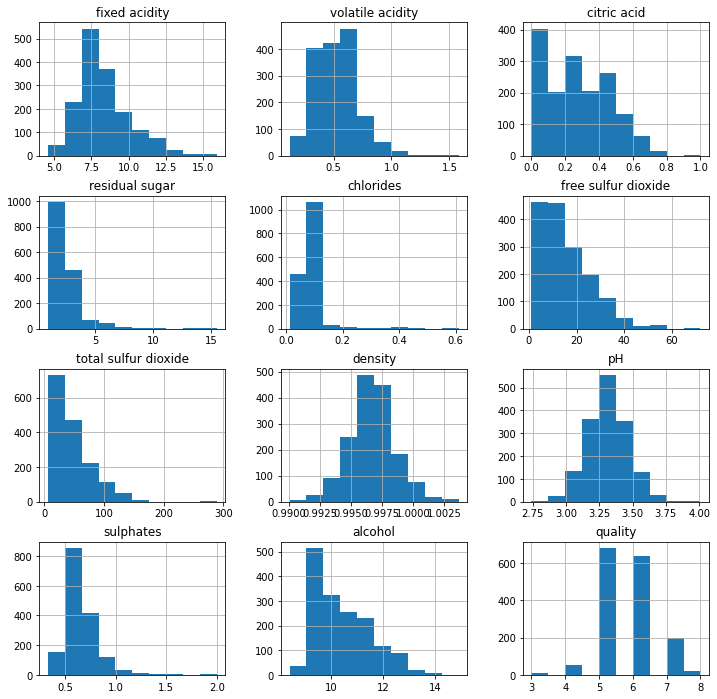

In [130]:
x=len(dataset.columns) 
fig = plt.figure(figsize = (x,x))
ax = fig.gca()
dataset.hist(ax=ax)
plt.show()

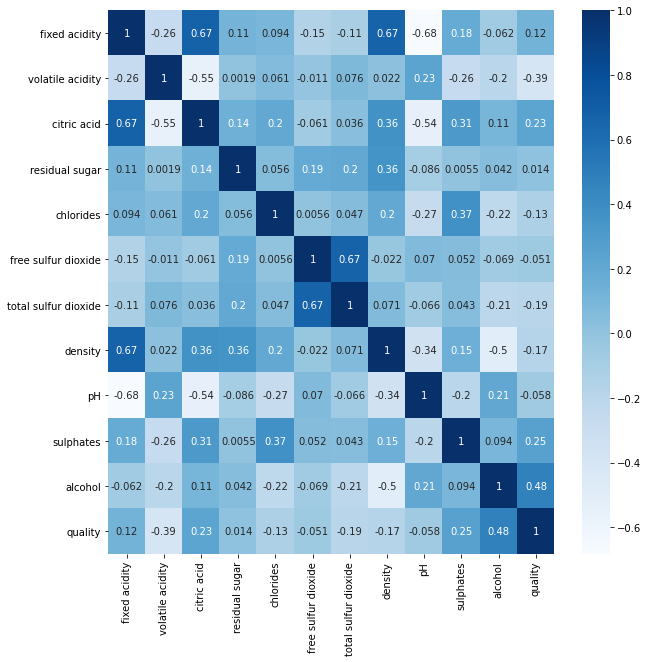

In [131]:
corr = dataset.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, cmap="Blues", annot=True);

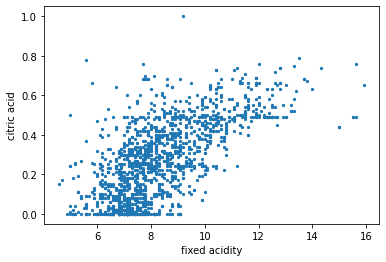

In [132]:
dataset.plot.scatter(x='fixed acidity', y='citric acid', s=5)

plt.show()

In [133]:
#Sulphates and citric acid can make the quality higher while Fixed acid and acitric acid is partially the same info

##Regressions for ML

In [134]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [136]:
#Support Vector Machine test
svm_model = svm.SVC(gamma='auto',C=5,kernel='rbf')
svm_model.fit(X_train,y_train)
y_pred = svm_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        14
           5       0.60      0.68      0.64       169
           6       0.55      0.51      0.53       170
           7       0.43      0.45      0.44        40
           8       0.00      0.00      0.00         5

    accuracy                           0.55       400
   macro avg       0.26      0.27      0.27       400
weighted avg       0.53      0.55      0.54       400



In [137]:
#Random Forest test
params = {'n_estimators':[100,150], 'criterion':['gini', 'entropy']}
#Hyper parameter tuning
rf_model =GridSearchCV(estimator=RandomForestClassifier(),param_grid=params,scoring='accuracy', cv=5)
rf_model = rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        14
           5       0.72      0.79      0.75       169
           6       0.68      0.68      0.68       170
           7       0.55      0.57      0.56        40
           8       0.00      0.00      0.00         5

    accuracy                           0.68       400
   macro avg       0.32      0.34      0.33       400
weighted avg       0.65      0.68      0.66       400



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [140]:
rf_model.predict([[10.3, 0.32, 0.45, 6.40, 0.073, 5.0, 13.0, 0.9976, 3.23, 0.82, 12.6 ]])

array([7])

In [141]:
rf_model.predict([[10.7, 0.35, 0.53, 2.60, 0.070, 5.0, 16.0, 0.9972, 3.15, 0.65, 11.0 ]])

array([8])

In [142]:
df2 = dataset.iloc[495]
df2

fixed acidity           10.7000
volatile acidity         0.3500
citric acid              0.5300
residual sugar           2.6000
chlorides                0.0700
free sulfur dioxide      5.0000
total sulfur dioxide    16.0000
density                  0.9972
pH                       3.1500
sulphates                0.6500
alcohol                 11.0000
quality                  8.0000
Name: 495, dtype: float64